# Mushroom  Species Classification 

The purpose of this project is for me to learn about deep learning with PyTorch, using the fastai front end. 

**Keywords:** neural nets, deep learning, pytorch, fastai, transfer learning, one cycle learning, boot strapping. 

## Introduction

Have you ever...

## Data

The list of species of mushroom to included in this project was obtained from [The University of British Columbia Zoology website](https://www.zoology.ubc.ca/~biodiv/mushroom/). This directory contains a list of edible and poisonous species of coastal BC and the Pacific Northwest. There are three reasons that I choose this database to draw from:

    1. This list includes the majority of the most common mushroom species found in BC.
  
As a result, even though my classifier only includes 73 species of mushrooms (of the thousands of possible species), my final mushroom classifier may have some untility for people searching for mushrooms in this limited geograpjhical region 
   
    2. The list contains numerous instances of mustroom species coming from the same family.
    3. Included in the information provided about each species is a list of mushroom species that look similar to the given species. 
    
This is desirable because it adds a significant challenge to the problem. It would have been much easier to distinguish between species of mushrooms that have subtantially different features. 


The top 300 images (using the species name as the search term) were downloaded from bing image search using [](). *some not dled*

This tool had the advantage of allowing me to automate the gathering of a data set containing over 22,000 images in 76 categories. However this automation comes at the cost of introducing a subtantial amount of noise into the data set. The top 300 image search results included the following types of undesired images:

    1. Cartoon images
    2. Images that did not contain mushrooms
    3. Images that were too zoomed out
    4. Images that were too close up
    5. Images with writing or objects obscuring the mushrooms
    6. Images that featured objects such as: people, swiss army knives, baskets, tupperware, cell phones
    7. Images that did not contain any intact mushrooms
    8. Black and white images
    9. duplicate images
    10. Images of cooked mushrooms
    11. Images of mouldy mushrooms
    12. Blurry images 
    13. Images that were too small
    14. Low contrast images

The initial data set was cleaned by me, the final data set contains 'X number' of images from 73 categories. 
Some of these types of noise such as images of non-mushroom and cartoon images can be removed from the data set without introducing subtaintial limitations as to the types of images that can be input by a user in the final production model. Removal of other types of noise (zoomed out images, zoomed in images, blurry images, images that contain common objects etc...) introduces limitations on the generalizability of the model that need to be communicated to the user so that she can obtain the most reliable predictions from the model.

### Cleaning

Images for each of the 76 initial categories were saved into seprate folders. As a first step I looked through each of these folders 

**Deleted:** cartoons, images of non mushrooms, far away images of mushrooms, images with logo/writing covering the photo, images with people featured prominently (images with hands/arms were left in), images of mushrooms split in half (only, I left it if it also contained a whole mushroom, pictures of just the stems (too close up), things that were splices of many images, images with objects obscuring the mushroom, black and white photos, duplicates, pictures of spores/spore prints, cooked mushrooms,  blurry, dried mushrooms, mushrooms in baskets/tupper ware, too close up, very low contrast with bg, not rotted, swiss army knives, cell phones, 
    - Did this realizing that it puts limitations on the kinds of images users can enter. Tried to do it so that I could keep the instructions for image entry simple and remain able to accept most reasonable images.
    - I was doin this, deleting images that I thought it would be hard to learn from based on what they looked like to me (a human)


### Limitations

- The pictures should be: colour, from close up, of the whole intact fresh (not rotted, not cooked) mushroom(s). 
- For the production version Of the model I will guide the user to input a good picture by
    1. providing simple instructions: "Input a colour image of 
    2. providing example images.

## Building and training the neural net v1

In this first version of the project I will restrict myself to the techniques introduced to me in in the first 3 lessons of the course ["practical deep learning for coders"](https://course.fast.ai/). In later versions of the project I intend to improve on the results that I achieve here and finally put the model into production. 


We import all the necessary packages. We will be building our classifier using the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). 

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np
import pandas as pd

In [2]:
bs = 64

In [2]:
path = Path('mushroom_classification_data_cleaned/')

In [3]:
# talk about data augmentation here
tfms = get_transforms()
np.random.seed(33)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=tfms, size=224).normalize(imagenet_stats)

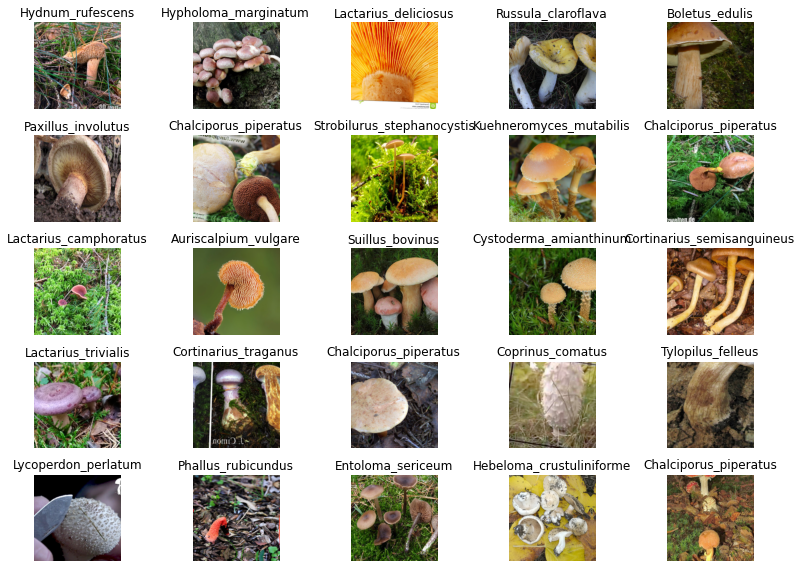

In [6]:
# doing this to see that data is not cropped or transformed poorly.
data.show_batch(rows=5, figsize=(11,8))

In [7]:
print(len(data.classes))
print(len(data.train_ds))
print(len(data.valid_ds))
print(len(data.train_ds)+len(data.valid_ds))

73
14075
3518
17593


In [4]:
# explain here what resnet50 is, and the idea of transfer learning.
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [9]:
learn.fit_one_cycle(8)

In [10]:
learn.save('stage-1')

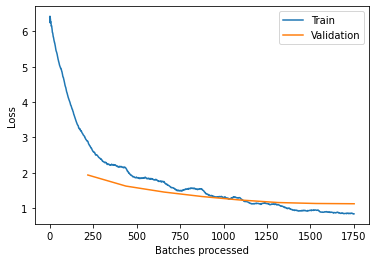

In [17]:
learn.recorder.plot_losses()

In [18]:
# The classificationInterpretation object contains all the information needed to interperate the model.
# Basically exactly the things that I will looking at in the next few cells
interp = ClassificationInterpretation.from_learner(learn)

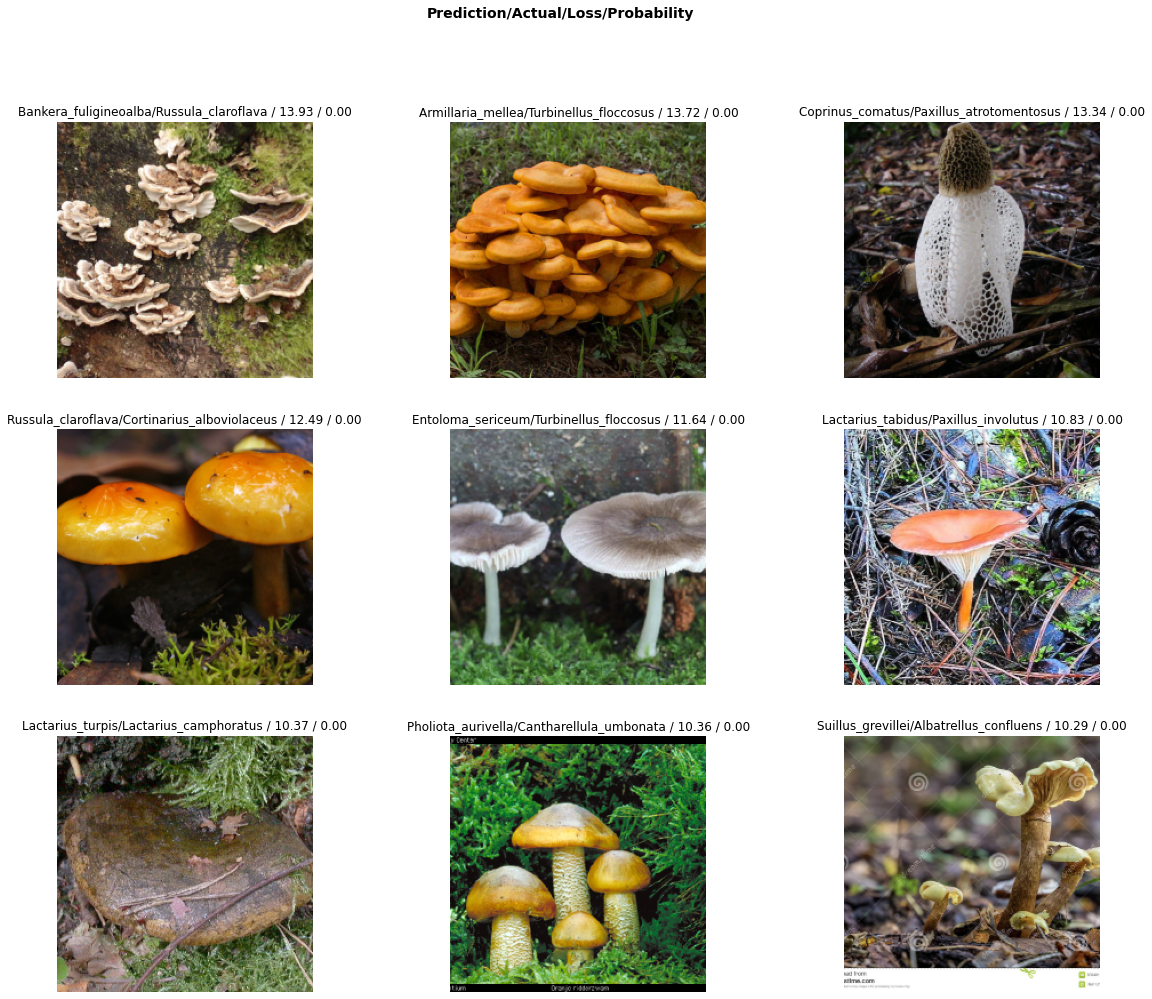

In [25]:
interp.plot_top_losses(9, figsize=(20,16))

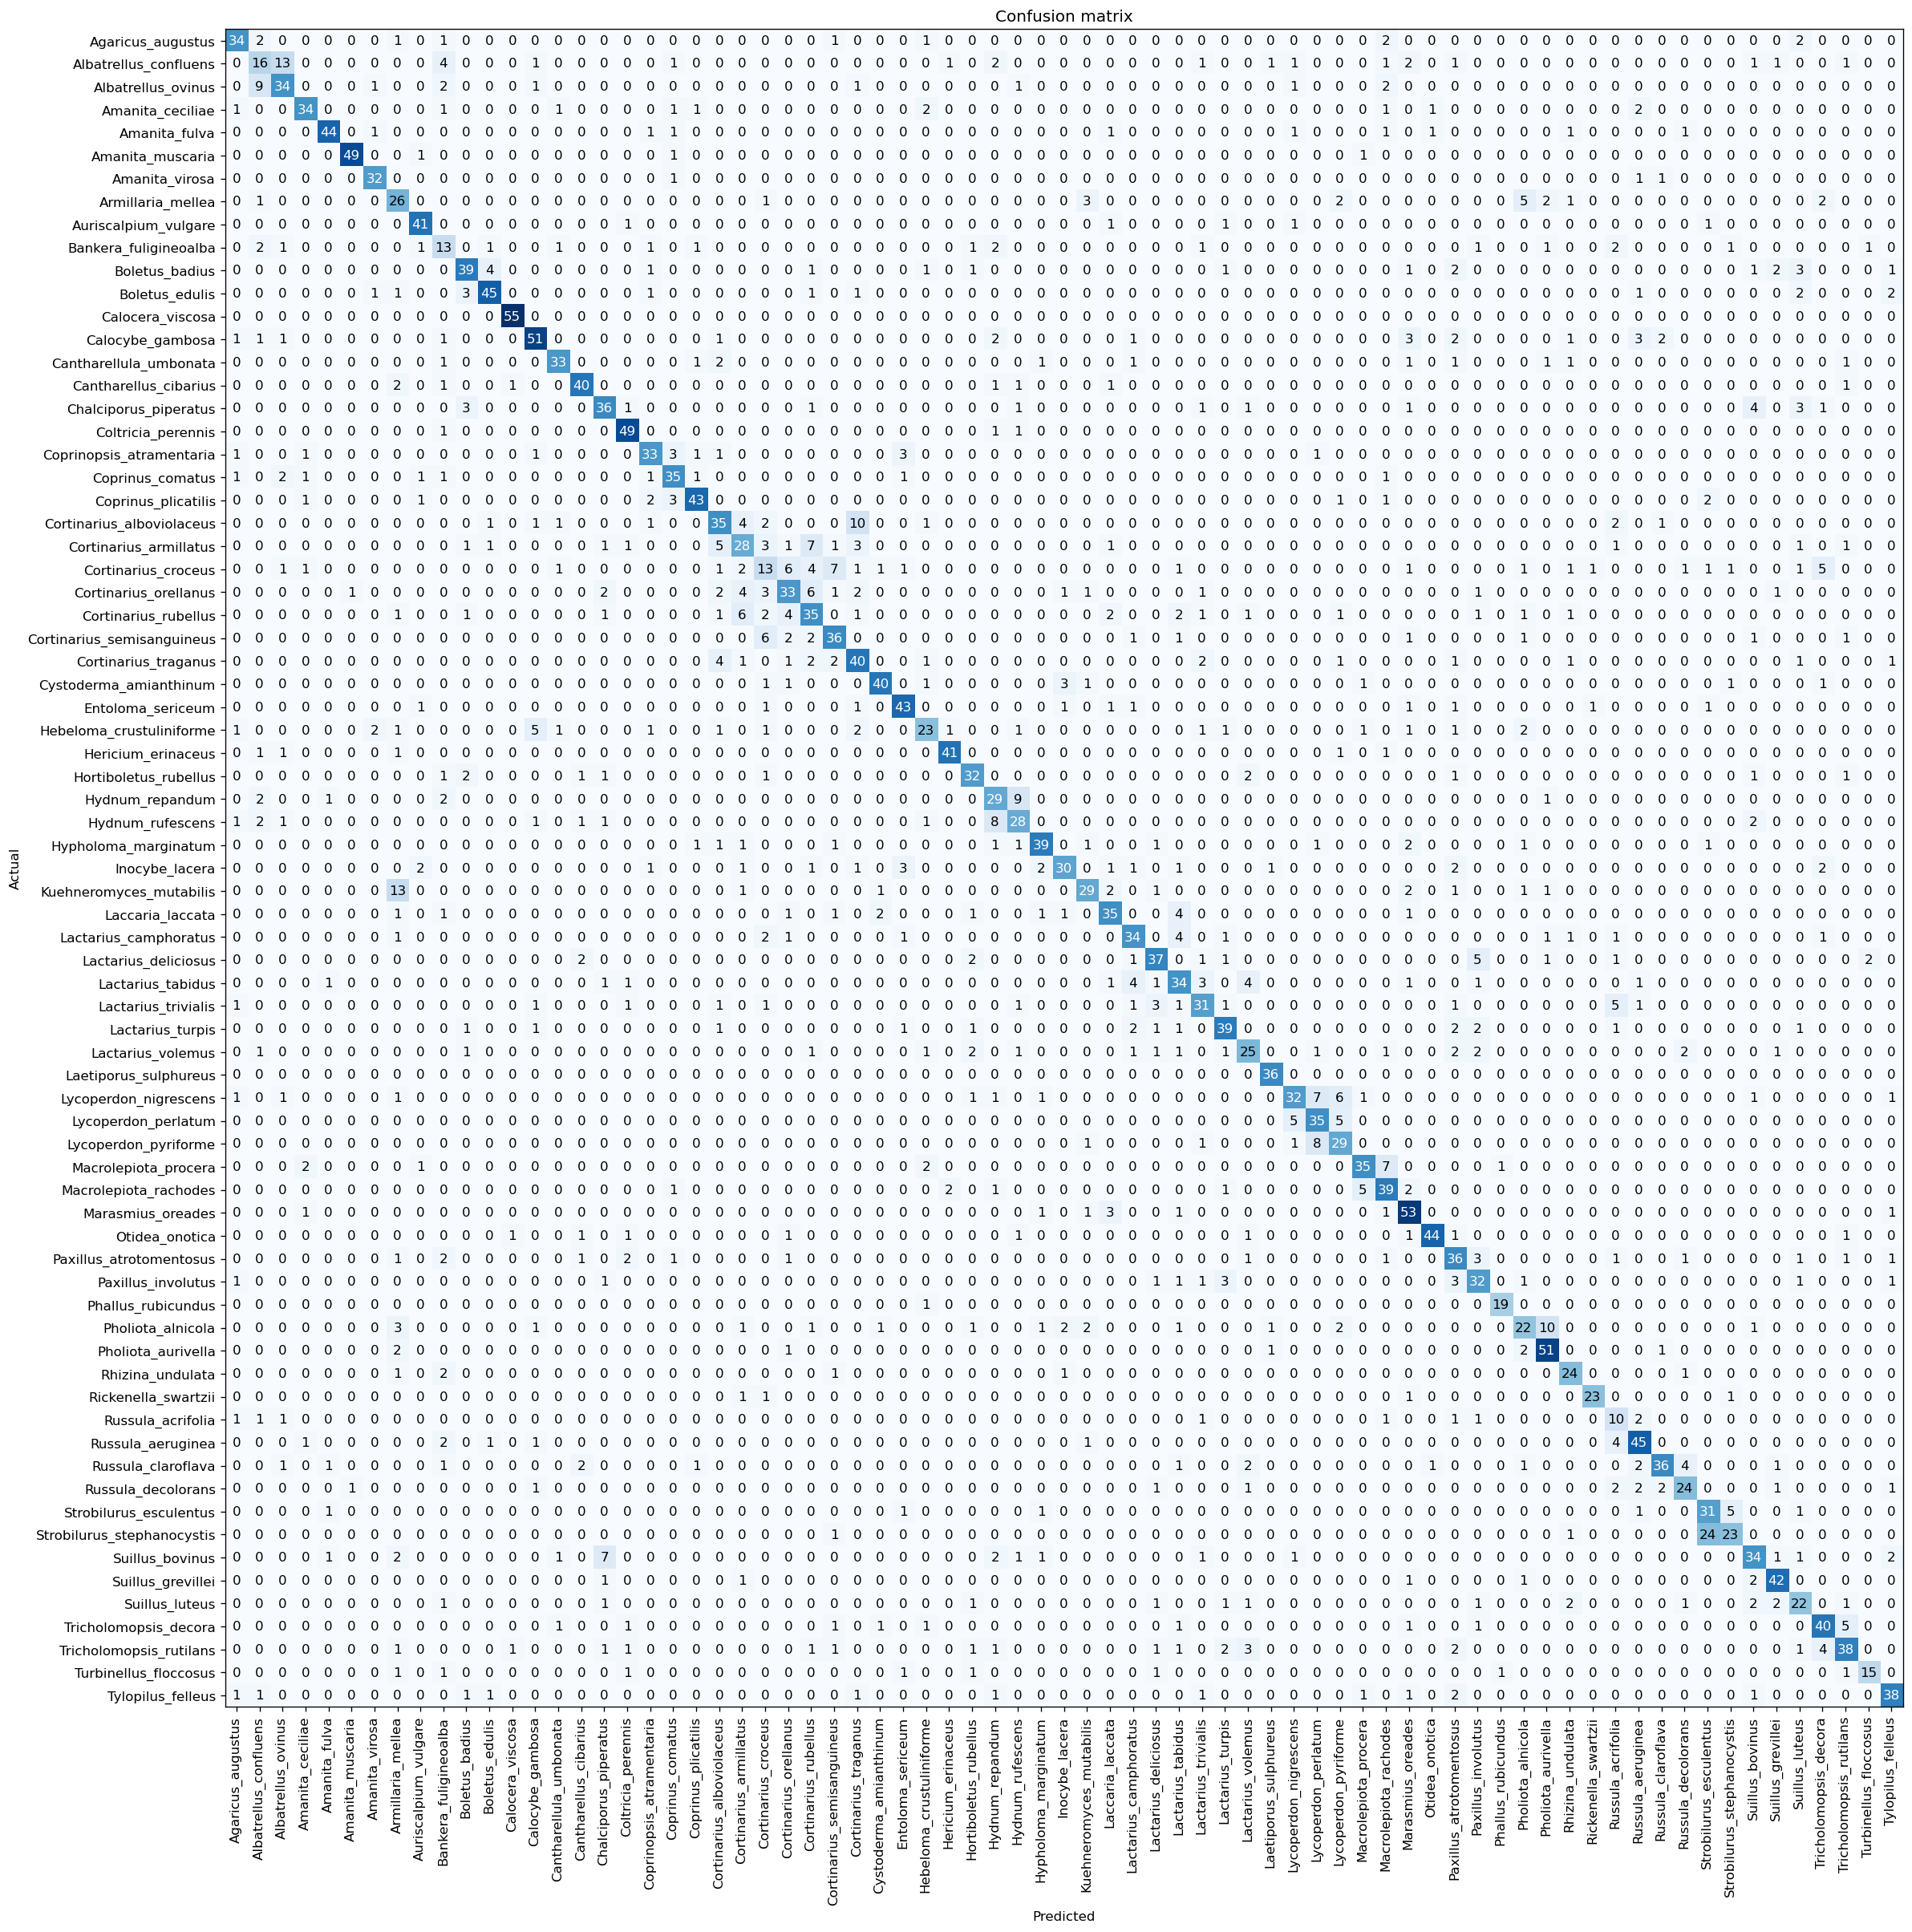

In [26]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=120)

In [27]:
interp.most_confused(min_val=2)

[('Strobilurus_stephanocystis', 'Strobilurus_esculentus', 24),
 ('Albatrellus_confluens', 'Albatrellus_ovinus', 13),
 ('Kuehneromyces_mutabilis', 'Armillaria_mellea', 13),
 ('Cortinarius_alboviolaceus', 'Cortinarius_traganus', 10),
 ('Pholiota_alnicola', 'Pholiota_aurivella', 10),
 ('Albatrellus_ovinus', 'Albatrellus_confluens', 9),
 ('Hydnum_repandum', 'Hydnum_rufescens', 9),
 ('Hydnum_rufescens', 'Hydnum_repandum', 8),
 ('Lycoperdon_pyriforme', 'Lycoperdon_perlatum', 8),
 ('Cortinarius_armillatus', 'Cortinarius_rubellus', 7),
 ('Cortinarius_croceus', 'Cortinarius_semisanguineus', 7),
 ('Lycoperdon_nigrescens', 'Lycoperdon_perlatum', 7),
 ('Macrolepiota_procera', 'Macrolepiota_rachodes', 7),
 ('Suillus_bovinus', 'Chalciporus_piperatus', 7),
 ('Cortinarius_croceus', 'Cortinarius_orellanus', 6),
 ('Cortinarius_orellanus', 'Cortinarius_rubellus', 6),
 ('Cortinarius_rubellus', 'Cortinarius_armillatus', 6),
 ('Cortinarius_semisanguineus', 'Cortinarius_croceus', 6),
 ('Lycoperdon_nigrescens

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


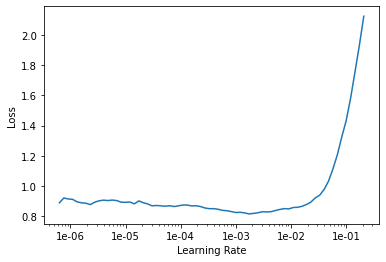

In [30]:
learn.recorder.plot()

In [5]:
learn.unfreeze()

In [9]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (14075 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus
Path: mushroom_classification_data_cleaned;

Valid: LabelList (3518 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Suillus_luteus,Lycoperdon_pyriforme,Lactarius_deliciosus,Suillus_bovinus,Cortinarius_alboviolaceus
Path: mushroom_classification_data_cleaned;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequent

In [10]:
learn.fit_one_cycle(8, max_lr=slice(1e-5,1e-4))

In [11]:
learn.save('stage-2')

In [12]:
# The classificationInterpretation object contains all the information needed to interperate the model.
# Basically exactly the things that I will looking at in the next few cells
interp = ClassificationInterpretation.from_learner(learn)

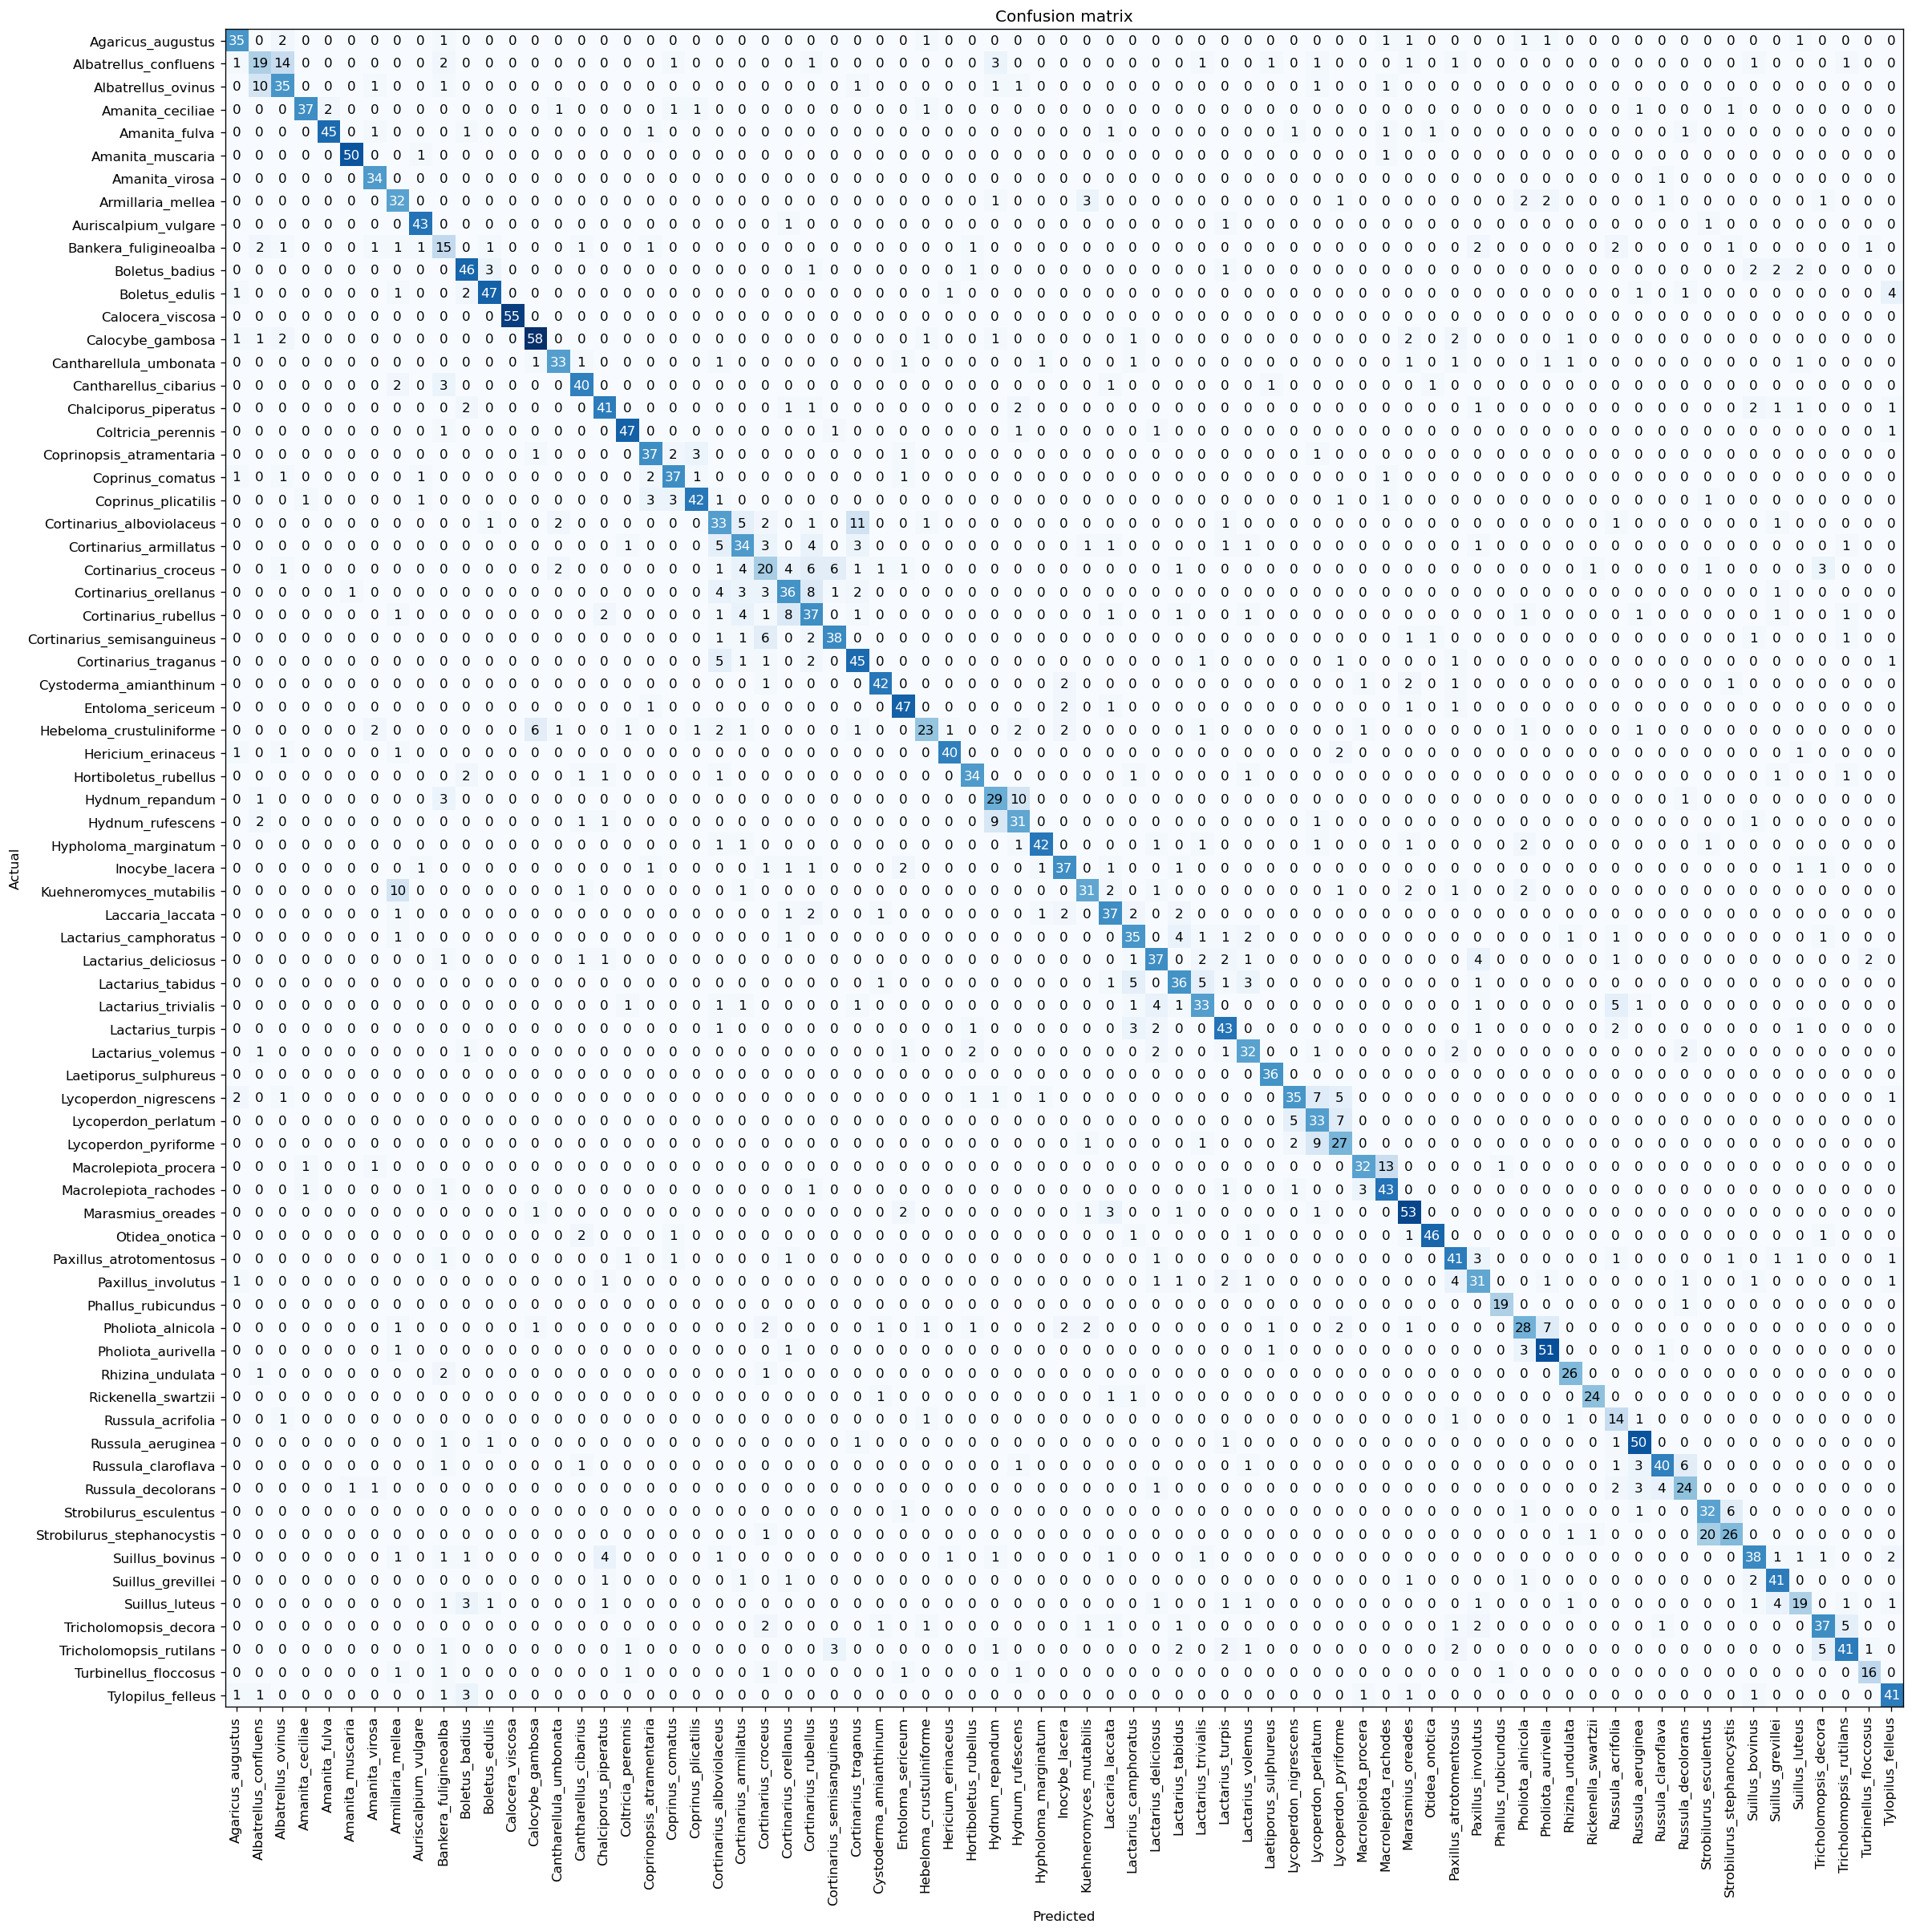

In [13]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=120)

In [14]:
interp.most_confused(min_val=2)

[('Strobilurus_stephanocystis', 'Strobilurus_esculentus', 20),
 ('Albatrellus_confluens', 'Albatrellus_ovinus', 14),
 ('Macrolepiota_procera', 'Macrolepiota_rachodes', 13),
 ('Cortinarius_alboviolaceus', 'Cortinarius_traganus', 11),
 ('Albatrellus_ovinus', 'Albatrellus_confluens', 10),
 ('Hydnum_repandum', 'Hydnum_rufescens', 10),
 ('Kuehneromyces_mutabilis', 'Armillaria_mellea', 10),
 ('Hydnum_rufescens', 'Hydnum_repandum', 9),
 ('Lycoperdon_pyriforme', 'Lycoperdon_perlatum', 9),
 ('Cortinarius_orellanus', 'Cortinarius_rubellus', 8),
 ('Cortinarius_rubellus', 'Cortinarius_orellanus', 8),
 ('Lycoperdon_nigrescens', 'Lycoperdon_perlatum', 7),
 ('Lycoperdon_perlatum', 'Lycoperdon_pyriforme', 7),
 ('Pholiota_alnicola', 'Pholiota_aurivella', 7),
 ('Cortinarius_croceus', 'Cortinarius_rubellus', 6),
 ('Cortinarius_croceus', 'Cortinarius_semisanguineus', 6),
 ('Cortinarius_semisanguineus', 'Cortinarius_croceus', 6),
 ('Hebeloma_crustuliniforme', 'Calocybe_gambosa', 6),
 ('Russula_claroflava',

In [15]:
df = pd.read_csv(path/'cleaned.csv', header='infer')

In [16]:
df.head(5)

name                  label
0            Hortiboletus_rubellus/71.Rubellus-2.jpg  Hortiboletus_rubellus
1  Hortiboletus_rubellus/230.20190928_171345-1024...  Hortiboletus_rubellus
2    Hortiboletus_rubellus/174.jan_hrasko_531001.jpg  Hortiboletus_rubellus
3               Hortiboletus_rubellus/85.Ruby-12.jpg  Hortiboletus_rubellus
4  Hortiboletus_rubellus/76.c8003dc2020c9a89ce9eb...  Hortiboletus_rubellus

In [17]:
tfms = get_transforms()
np.random.seed(33)
data = ImageDataBunch.from_df(path, df, valid_pct=0.2, ds_tfms=tfms, size=224).normalize(imagenet_stats)

In [18]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [19]:
learn.fit_one_cycle(8)

In [20]:
learn.save('cleaned-stage-1')

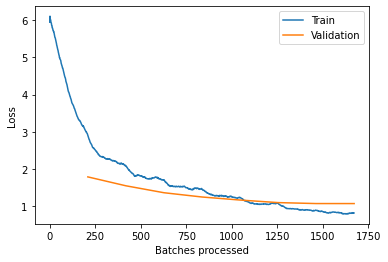

In [21]:
learn.recorder.plot_losses()

In [22]:
# The classificationInterpretation object contains all the information needed to interperate the model.
# Basically exactly the things that I will looking at in the next few cells
interp = ClassificationInterpretation.from_learner(learn)

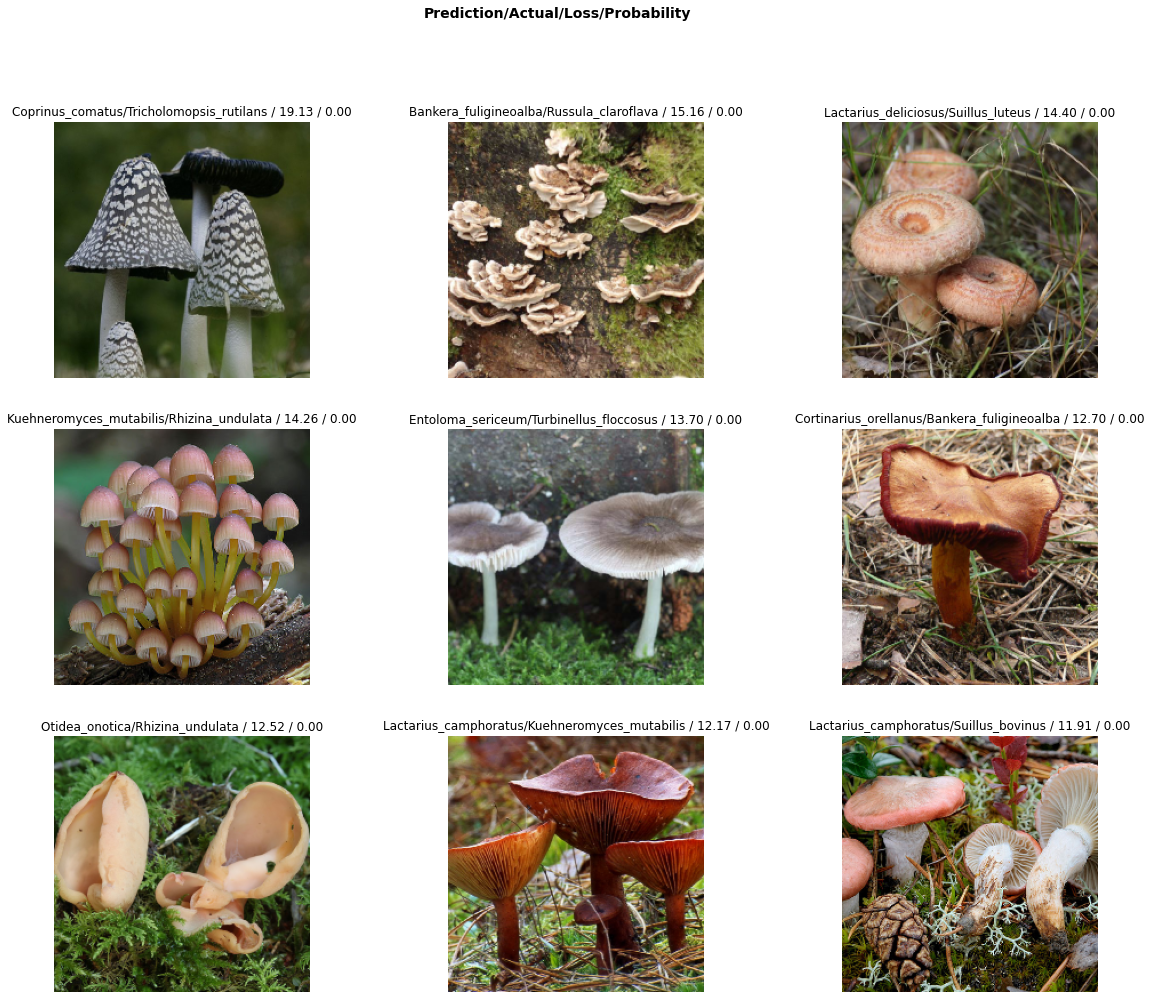

In [23]:
interp.plot_top_losses(9, figsize=(20,16))

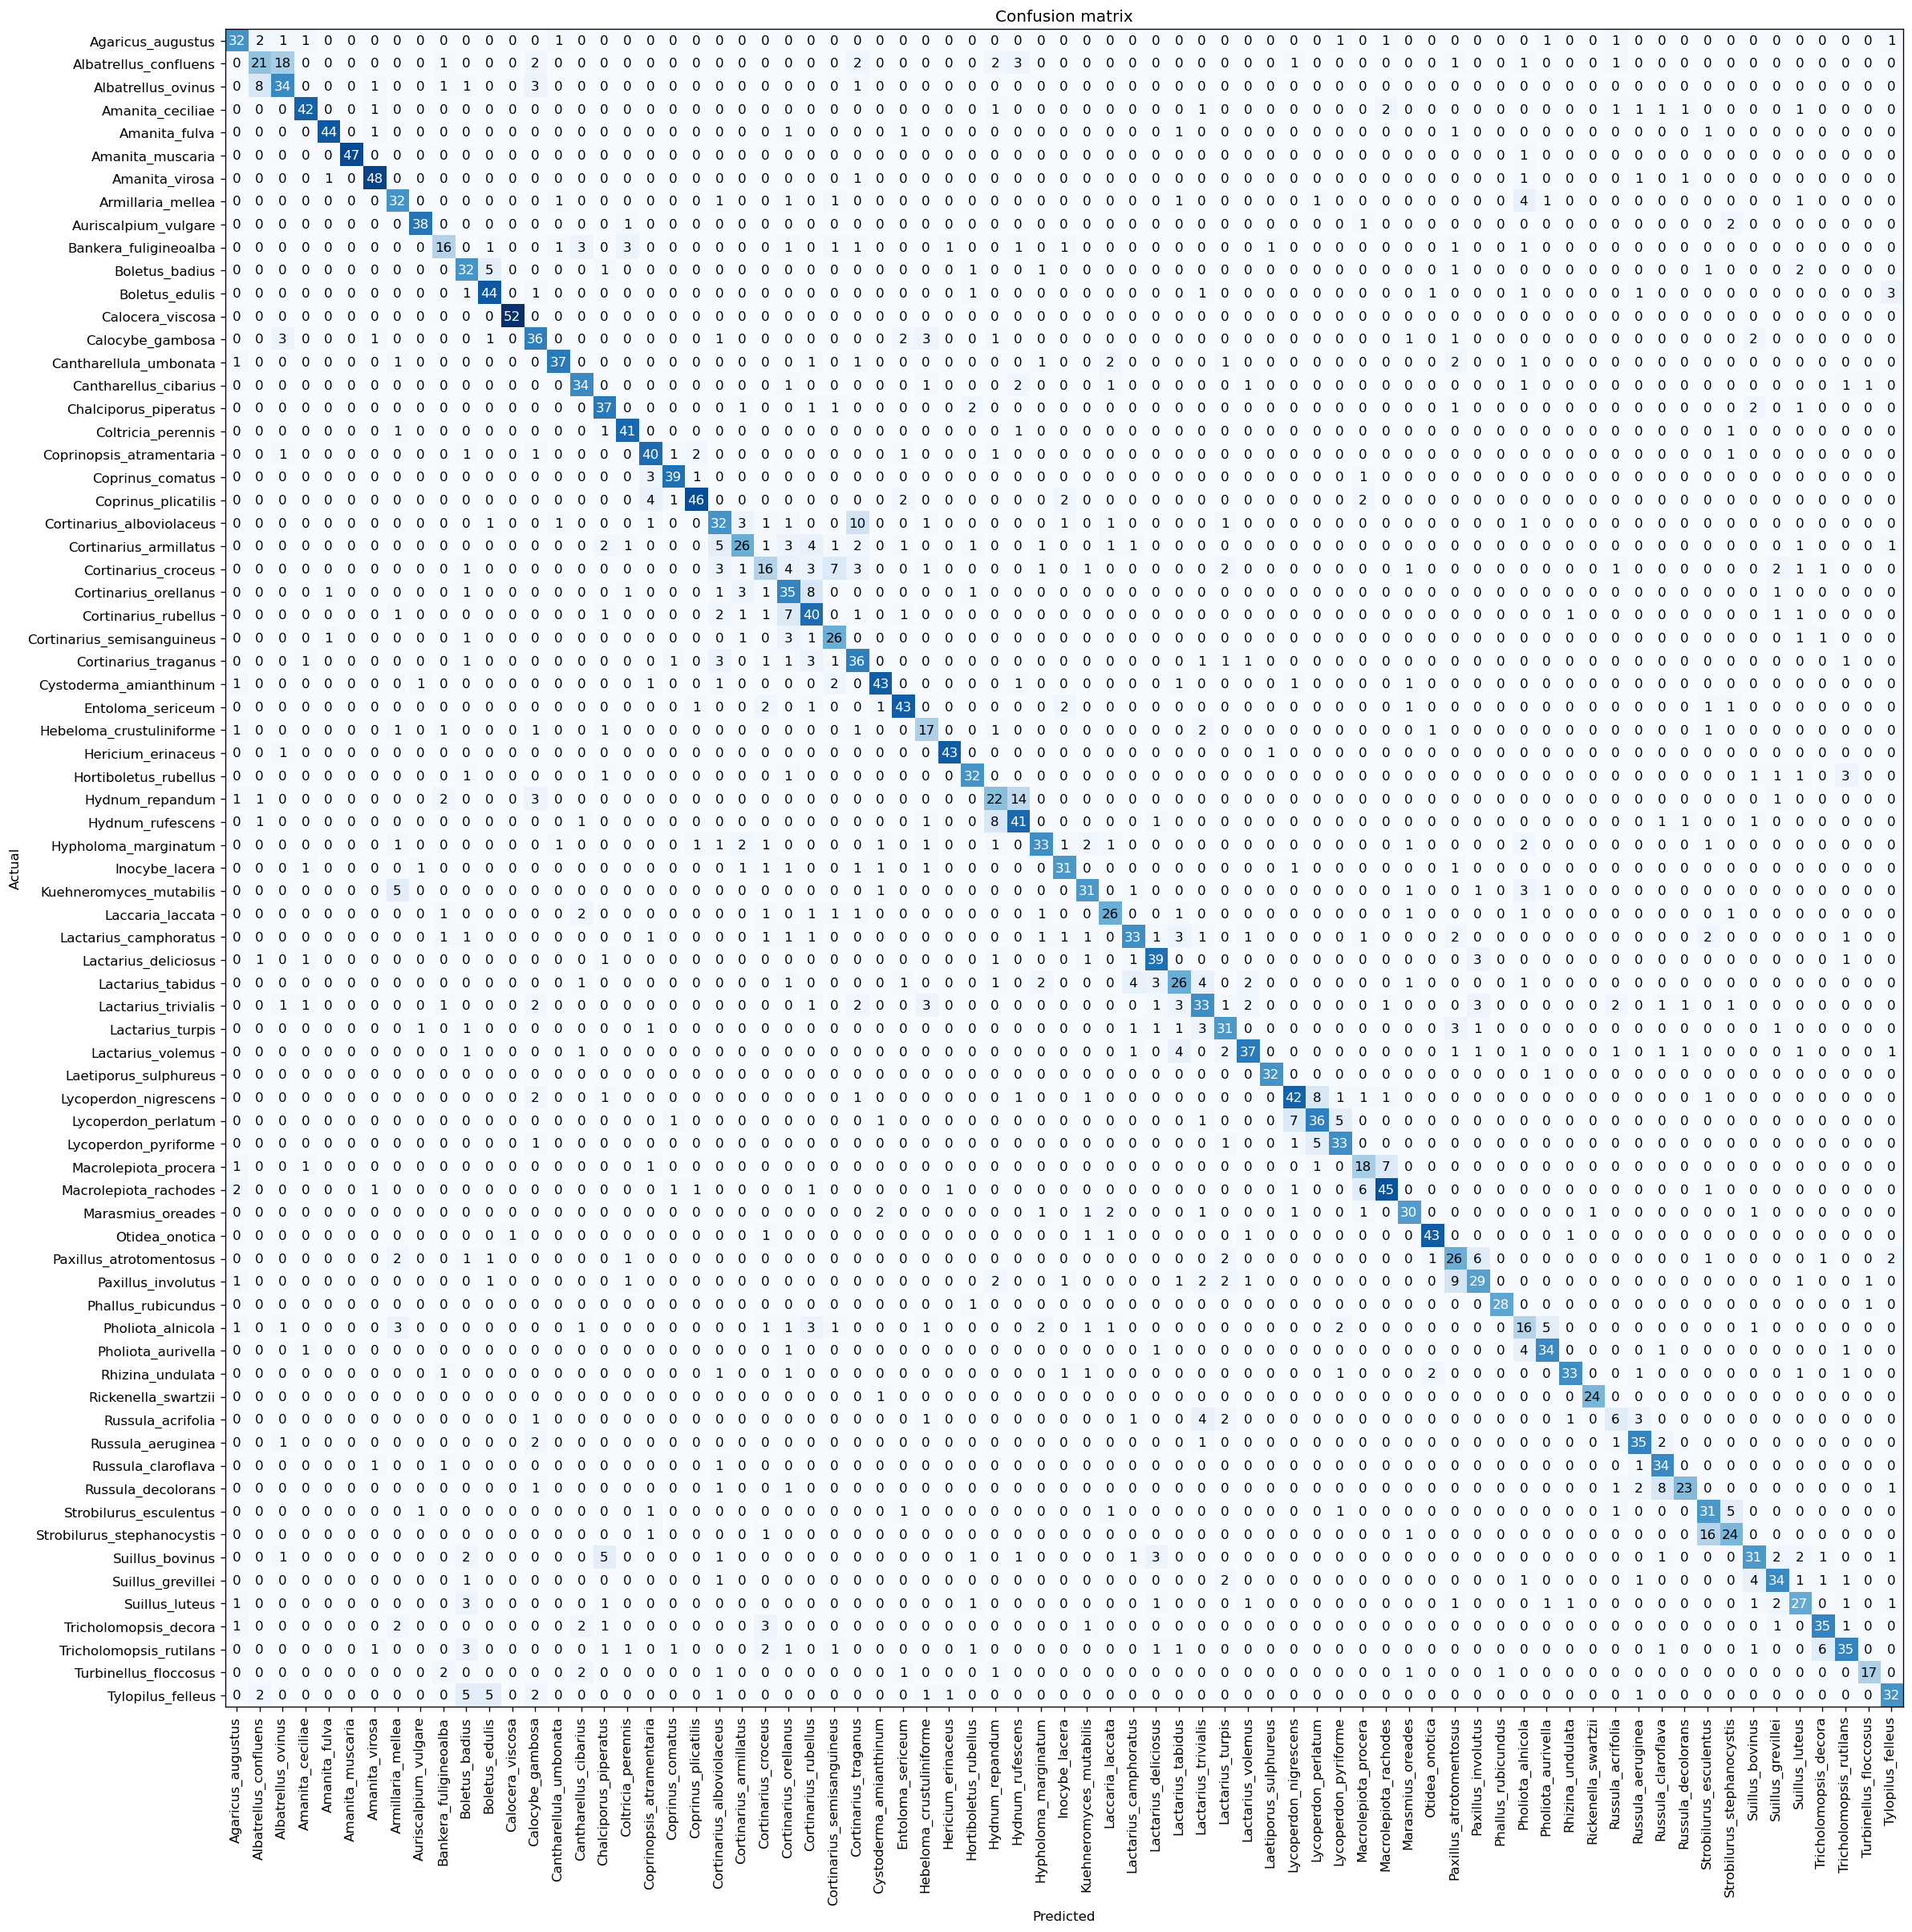

In [24]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=120)

In [25]:
interp.most_confused(min_val=2)

[('Albatrellus_confluens', 'Albatrellus_ovinus', 18),
 ('Strobilurus_stephanocystis', 'Strobilurus_esculentus', 16),
 ('Hydnum_repandum', 'Hydnum_rufescens', 14),
 ('Cortinarius_alboviolaceus', 'Cortinarius_traganus', 10),
 ('Paxillus_involutus', 'Paxillus_atrotomentosus', 9),
 ('Albatrellus_ovinus', 'Albatrellus_confluens', 8),
 ('Cortinarius_orellanus', 'Cortinarius_rubellus', 8),
 ('Hydnum_rufescens', 'Hydnum_repandum', 8),
 ('Lycoperdon_nigrescens', 'Lycoperdon_perlatum', 8),
 ('Russula_decolorans', 'Russula_claroflava', 8),
 ('Cortinarius_croceus', 'Cortinarius_semisanguineus', 7),
 ('Cortinarius_rubellus', 'Cortinarius_orellanus', 7),
 ('Lycoperdon_perlatum', 'Lycoperdon_nigrescens', 7),
 ('Macrolepiota_procera', 'Macrolepiota_rachodes', 7),
 ('Macrolepiota_rachodes', 'Macrolepiota_procera', 6),
 ('Paxillus_atrotomentosus', 'Paxillus_involutus', 6),
 ('Tricholomopsis_rutilans', 'Tricholomopsis_decora', 6),
 ('Boletus_badius', 'Boletus_edulis', 5),
 ('Cortinarius_armillatus', 'Cor

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


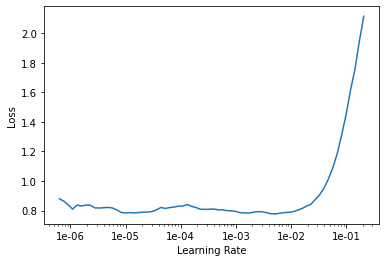

In [27]:
learn.recorder.plot()

In [28]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(8, max_lr=slice(1e-5,1e-4))

In [30]:
learn.save('cleaned-stage-2')

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


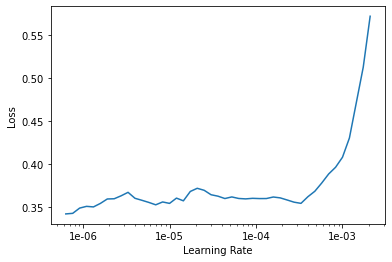

In [32]:
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-5))

In [34]:
learn.save('cleaned-stage-3')

## Supplementary materials